### Assignment Using Python
These two weeks we are going to be focused on tree maps, area charts, and stacked area charts and using various tools to create these visualizations. Since the course is structured in 2-week blocks, every 2 weeks are going to be focused on a different visualization type that you create in various tools. This is to get you familiar with the pros/cons of Python, R, Tableau, and PowerBI – all tools you are going to run into in the real world, but that all have their own set of pros/cons. The book will cover one way to create a visualization, but we all know we have many tools at our disposal, so throughout these exercises you will be challenged to learn a variety of ways. Follow the recommendations and suggestions from your book on the design and use videos and other sources to find various ways to build the same visualizations.

Sample Datasets can be found here for everything I am going to ask you to do – but you don’t have to use this data, you can use whatever data you want if you want to try learning on something else.

Sample Datasets (click on the Downloads tab.)

You may also download them directly from this link:

Exercise 3.2 Datasets (click the link to download a folder containing the datasets.)

You need to submit:

1 tree map, 1 area chart and 1 stacked area chart using Tableau or PowerBI

1 tree map, 1 area chart and 1 stacked area chart using Python

1 tree map, 1 area chart and 1 stacked area chart using R


In [1]:
# Import required libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import squarify
import numpy as np
from datetime import datetime as dt

In [2]:
# Read world population data
dirData = 'data'
file_expenditures = 'expenditures.txt'
file_unemployement = 'unemployement-rate-1948-2010.csv'

dir_expenditures = dirData+'/'+file_expenditures
dir_unemployment = dirData+'/'+file_unemployement

raw_expenditures = pd.read_csv(dir_expenditures, sep = '\t', header=0)
raw_unemployment = pd.read_csv(dir_unemployment) 

# Calculate total expenditure for categories
expenditures_cat = raw_expenditures.groupby(['category'])['expenditure'].sum().reset_index()

# Calculate total expenditure by year
expenditures_year = raw_expenditures.groupby(['year'])['expenditure'].sum().reset_index()

print(raw_expenditures.head())
print(expenditures_cat.head())
print(expenditures_year.head())
print(raw_unemployment.head())

   year             category  expenditure  sex
0  2008                 Food         6443    1
1  2008  Alcoholic Beverages          444    1
2  2008              Housing        17109    1
3  2008              Apparel         1801    1
4  2008       Transportation         8604    1
              category  expenditure
0  Alcoholic Beverages         8424
1              Apparel        41833
2   Cash Contributions        27987
3            Education        14498
4        Entertainment        44273
   year  expenditure
0  1984        21972
1  1985        23489
2  1986        23865
3  1987        24415
4  1988        25893
     Series id  Year Period  Value
0  LNS14000000  1948    M01    3.4
1  LNS14000000  1948    M02    3.8
2  LNS14000000  1948    M03    4.0
3  LNS14000000  1948    M04    3.9
4  LNS14000000  1948    M05    3.5


### Treemap
#### Expenditure data
For this treemap, I would like to see how much each category has costed in total.

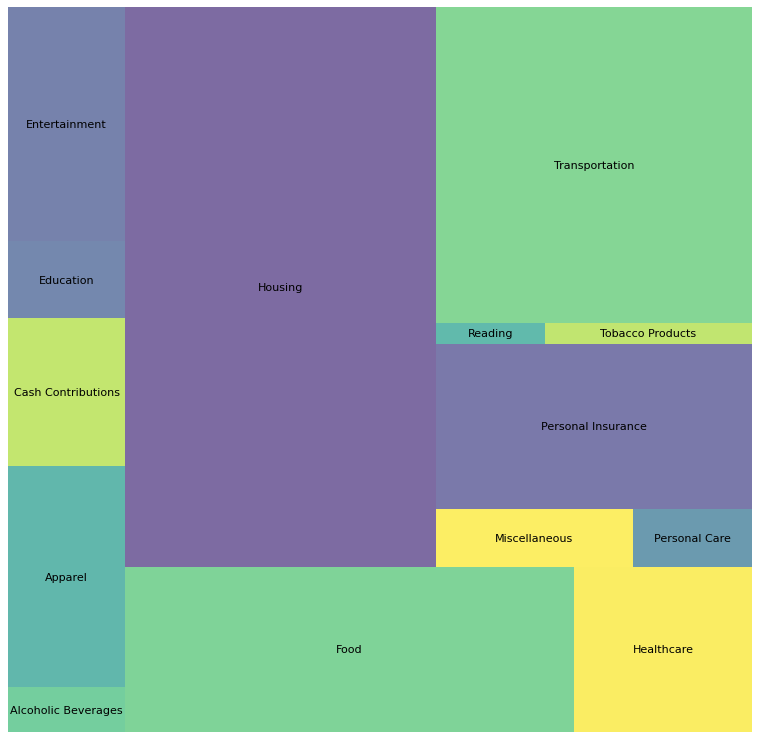

In [3]:
# Create tree map
fig, ax = plt.subplots(1,1,figsize=(12, 12), dpi= 80)
squarify.plot(sizes=expenditures_cat['expenditure'], label=expenditures_cat['category'], alpha=.7 )
#plt.figure(figsize=(15,10))
plt.axis('off') 
plt.show() 

### Area Chart
#### Expenditure data
For this area chart, I would like to see how much was the total expenditure every year

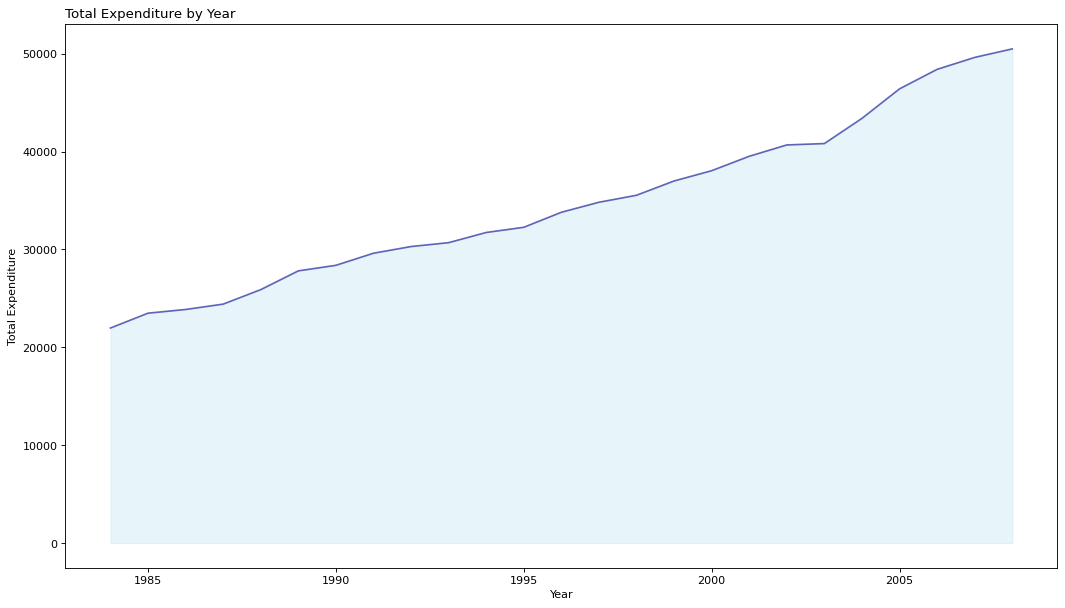

In [4]:
# Create x and y values to plot
x = expenditures_year['year']
y = expenditures_year['expenditure']
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
# Add a stronger line on top (edge)
plt.fill_between( x, y, color='skyblue', alpha=0.2)
plt.title('Total Expenditure by Year', loc='left')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.plot(x, y, color='darkblue', alpha=0.6)

### Stacked Area Chart
#### Expenditure data
For stacked area chart, I would like to see how much was the total expenditure every year for each category

In [7]:
len(columns)

14

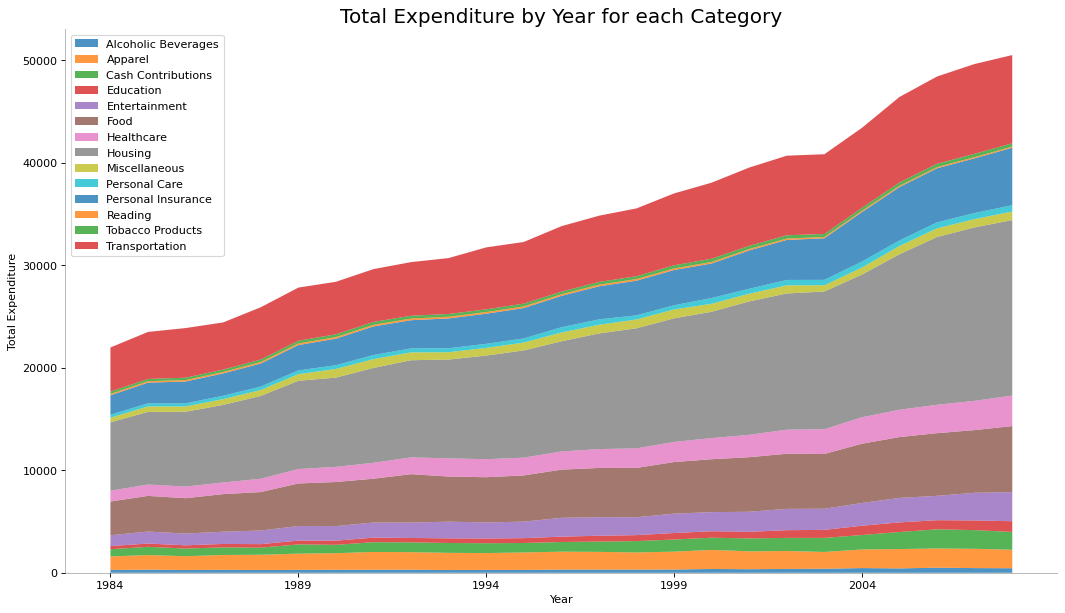

In [8]:
# Reshape data to be used for stacked area chart
plt_expenditures = raw_expenditures.loc[:, raw_expenditures.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
plt_expenditures.reset_index(level=0, inplace=True)

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = plt_expenditures.columns[1:]
labs = plt_expenditures.values.tolist()

# Prepare data
x  = plt_expenditures['year'].values.tolist()
y0 = plt_expenditures[columns[0]].values.tolist()
y1 = plt_expenditures[columns[1]].values.tolist()
y2 = plt_expenditures[columns[2]].values.tolist()
y3 = plt_expenditures[columns[3]].values.tolist()
y4 = plt_expenditures[columns[4]].values.tolist()
y5 = plt_expenditures[columns[5]].values.tolist()
y6 = plt_expenditures[columns[6]].values.tolist()
y7 = plt_expenditures[columns[7]].values.tolist()
y8 = plt_expenditures[columns[8]].values.tolist()
y9 = plt_expenditures[columns[9]].values.tolist()
y10 = plt_expenditures[columns[10]].values.tolist()
y11 = plt_expenditures[columns[11]].values.tolist()
y12 = plt_expenditures[columns[12]].values.tolist()
y13 = plt_expenditures[columns[13]].values.tolist()
#y12 = plt_expenditures[columns[12]].values.tolist()
y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)

# Create title
ax.set_title('Total Expenditure by Year for each Category', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Expenditure')

# Show legend
ax.legend(fontsize=10, ncol=1, loc = 'upper left')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Output graph
plt.show()


**End of Code**